Tải file CSV thành công.
Các hướng gió ban đầu: ['SE' 'cv' 'NW' 'NE']
Tổng số features sử dụng: 9
Đang xử lý giá trị NaNs bằng ffill()...

--- 5 dòng đầu tiên của dữ liệu (sau khi OHE và fillna) ---
   id  year  month  day  hour  pm2.5  dew_point  temperature  pressure  \
0  25  2010      1    2     0    129        -16         -4.0    1020.0   
1  26  2010      1    2     1    148        -15         -4.0    1020.0   
2  27  2010      1    2     2    159        -11         -5.0    1021.0   
3  28  2010      1    2     3    181         -7         -5.0    1022.0   
4  29  2010      1    2     4    138         -7         -5.0    1022.0   

  wind_direction  wind_speed  hours_snow  hours_rain  wind_dir_NE  \
0             SE        1.79           0           0            0   
1             SE        2.68           0           0            0   
2             SE        3.57           0           0            0   
3             SE        5.36           1           0            0   
4          

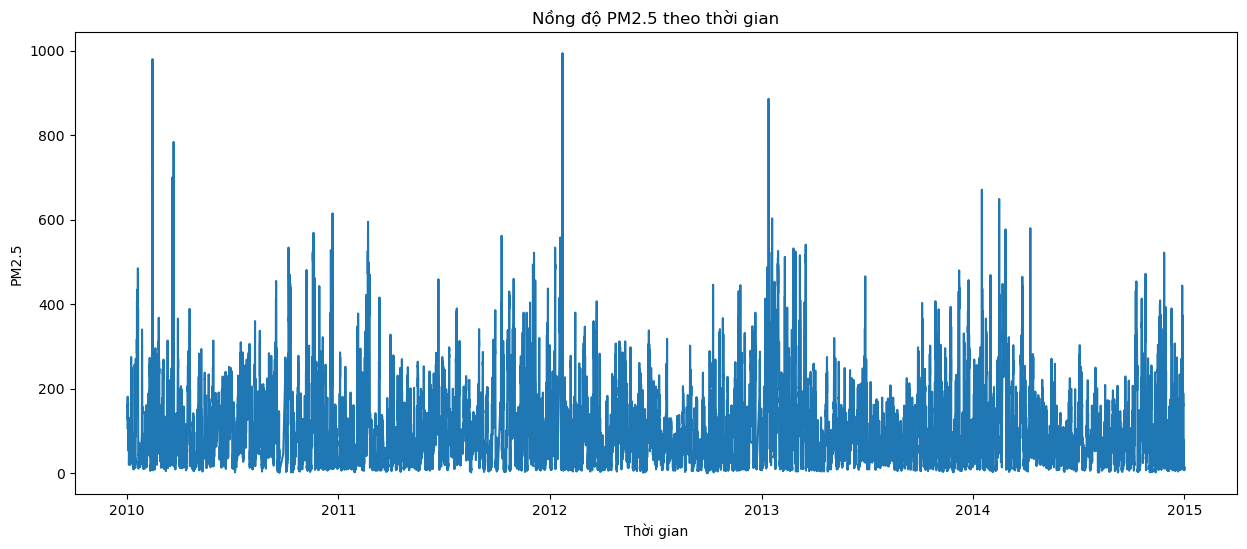

Đang vẽ ma trận tương quan...


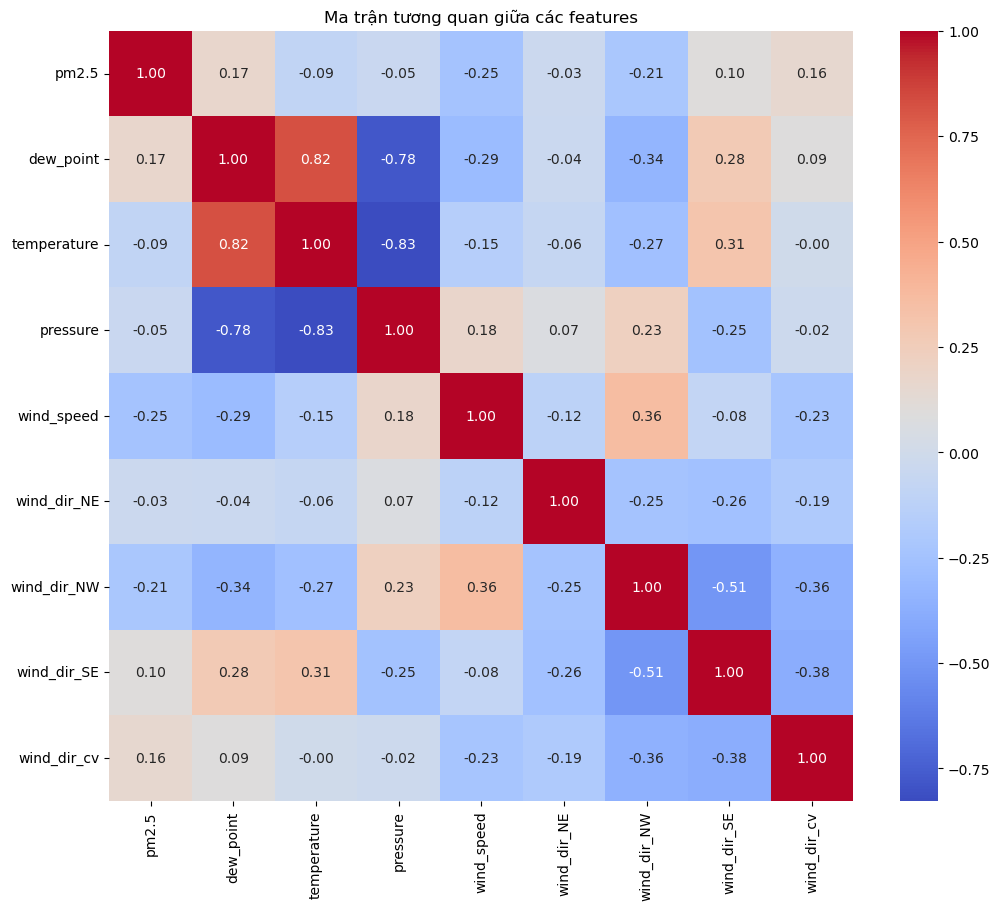

Đang vẽ phân phối PM2.5...


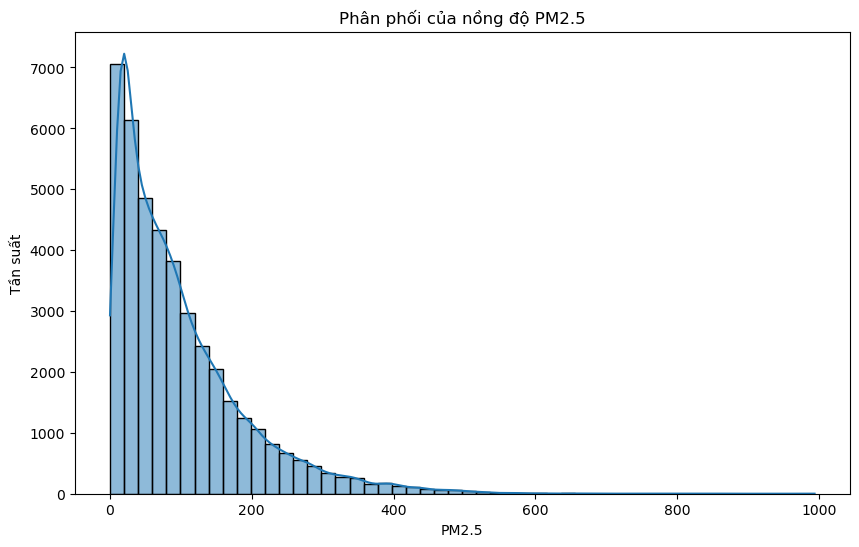


Đang chia và chuẩn hóa dữ liệu...
Shape của scaled_train: (33405, 9)
Shape của scaled_test: (8352, 9)

--- 5 dòng đầu tiên của scaled_train ---
[[0.12977867 0.3015873  0.25       0.52727273 0.00237151 0.
  0.         1.         0.        ]
 [0.14889336 0.31746032 0.25       0.52727273 0.00394662 0.
  0.         1.         0.        ]
 [0.15995976 0.38095238 0.23333333 0.54545455 0.00552173 0.
  0.         1.         0.        ]
 [0.18209256 0.44444444 0.23333333 0.56363636 0.00868965 0.
  0.         1.         0.        ]
 [0.138833   0.44444444 0.23333333 0.56363636 0.01026476 0.
  0.         1.         0.        ]]

Shape của X_train: (33395, 10, 9)
Shape của y_train: (33395,)
Shape của X_test: (8342, 10, 9)
Shape của y_test: (8342,)

--- Mẫu đầu vào (X_train[0]) ---
[[0.12977867 0.3015873  0.25       0.52727273 0.00237151 0.
  0.         1.         0.        ]
 [0.14889336 0.31746032 0.25       0.52727273 0.00394662 0.
  0.         1.         0.        ]
 [0.15995976 0.38095238 0.2

In [73]:
# --- PHẦN 1: KHỞI TẠO VÀ TẢI DỮ LIỆU ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import sys

# Đọc dữ liệu
# LƯU Ý: Hãy đảm bảo đường dẫn này chính xác trên máy của bạn
try:
    # Đường dẫn file gốc của bạn
    df = pd.read_csv(r'D:\\1-REFERENCES\\11-URA\\Beijing-PM2.5.csv')
    print("Tải file CSV thành công.")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'Beijing-PM2.5.csv'.")
    print("Hãy thay đổi đường dẫn trong biến 'df = pd.read_csv(...)' cho đúng với máy của bạn.")
    # Tạo dataframe rỗng để code không bị lỗi khi chạy tiếp
    df = pd.DataFrame() 
    # Hoặc bạn có thể raise lỗi ở đây
    # raise

if not df.empty:
    # --- PHẦN 2: TIỀN XỬ LÝ VÀ CHỌN FEATURE ---

    # 1. XỬ LÝ ONE-HOT ENCODING
    print(f"Các hướng gió ban đầu: {df['wind_direction'].unique()}")
    wind_dummies = pd.get_dummies(df['wind_direction'], prefix='wind_dir', dtype=int)
    df = pd.concat([df, wind_dummies], axis=1)

    # 2. CHỌN FEATURES
    wind_dummy_columns = wind_dummies.columns.tolist()
    features_to_use = ['pm2.5', 'dew_point', 'temperature', 'pressure', 'wind_speed'] + wind_dummy_columns
    num_features = len(features_to_use)
    print(f"Tổng số features sử dụng: {num_features}")

    # 3. XỬ LÝ NANS (ĐÃ SỬA CẢNH BÁO DEPRECATION)
    # Sử dụng .ffill() thay vì .fillna(method='ffill')
    print("Đang xử lý giá trị NaNs bằng ffill()...")
    df['pm2.5'] = df['pm2.5'].ffill()
    df['dew_point'] = df['dew_point'].ffill()
    df['temperature'] = df['temperature'].ffill()
    df['pressure'] = df['pressure'].ffill()
    df['wind_speed'] = df['wind_speed'].ffill()

    # Lấy dữ liệu từ các cột đã chọn
    data = df[features_to_use].values

    # In 5 dòng đầu tiên (đã có cột OHE)
    print("\n--- 5 dòng đầu tiên của dữ liệu (sau khi OHE và fillna) ---")
    print(df.head())
    
    # In thông tin (kiểu dữ liệu, non-null)
    print("\n--- Thông tin DataFrame (sau khi fillna) ---")
    df.info()

    # In thống kê mô tả cho các cột features
    print("\n--- Thống kê mô tả (các cột features) ---")
    print(df[features_to_use].describe())

    # --- PHẦN 3: PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA) ---

    # Tạo cột datetime để trực quan hóa
    if 'datetime' not in df.columns:
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

    # Vẽ biểu đồ pm2.5 theo thời gian
    print("\nĐang vẽ biểu đồ PM2.5 theo thời gian...")
    plt.figure(figsize=(15, 6))
    plt.plot(df['datetime'], df['pm2.5'])
    plt.title('Nồng độ PM2.5 theo thời gian')
    plt.xlabel('Thời gian')
    plt.ylabel('PM2.5')
    plt.show()

    # Tính toán ma trận tương quan
    print("Đang vẽ ma trận tương quan...")
    plt.figure(figsize=(12, 10))
    corr_matrix = df[features_to_use].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Ma trận tương quan giữa các features')
    plt.show()

    # Vẽ phân phối của PM2.5
    print("Đang vẽ phân phối PM2.5...")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['pm2.5'], kde=True, bins=50)
    plt.title('Phân phối của nồng độ PM2.5')
    plt.xlabel('PM2.5')
    plt.ylabel('Tần suất')
    plt.show()

    # --- PHẦN 4: CHUẨN BỊ DỮ LIỆU CHO MODEL ---

    # 1. Chuẩn hóa (Scaling)
    print("\nĐang chia và chuẩn hóa dữ liệu...")
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_size = int(len(data) * 0.8)
    train_data = data[:train_size]
    test_data = data[train_size:]

    scaled_train = scaler.fit_transform(train_data)
    scaled_test = scaler.transform(test_data)
    
    print(f"Shape của scaled_train: {scaled_train.shape}")
    print(f"Shape của scaled_test: {scaled_test.shape}")
    print("\n--- 5 dòng đầu tiên của scaled_train ---")
    print(scaled_train[:5])

    # 2. Tạo chuỗi (Sequences)
    def create_sequences_multi(data, seq_length):
        X = []
        y = []
        for i in range(len(data) - seq_length):
            # Input (X): Lấy 'seq_length' bước, TẤT CẢ các features
            X.append(data[i:(i + seq_length), :]) 
            # Target (y): Lấy giá trị ở bước tiếp theo, CHỈ LẤY cột đầu tiên (pm2.5)
            y.append(data[i + seq_length, 0]) 
        return np.array(X), np.array(y)

    seq_length = 10 
    X_train, y_train = create_sequences_multi(scaled_train, seq_length)
    X_test, y_test = create_sequences_multi(scaled_test, seq_length)

    print(f"\nShape của X_train: {X_train.shape}")
    print(f"Shape của y_train: {y_train.shape}")
    print(f"Shape của X_test: {X_test.shape}")
    print(f"Shape của y_test: {y_test.shape}")

    print(f"\n--- Mẫu đầu vào (X_train[0]) ---")
    print(X_train[0])
    print(f"\n--- Mẫu đầu ra (y_train[0]) ---")
    print(y_train[0])


# --- PHẦN 5: XÂY DỰNG VÀ HUẤN LUYỆN MODEL (PYTORCH) ---
# LƯU Ý: Phần này sẽ chỉ chạy nếu bạn đã sửa lỗi môi trường PyTorch
print("\n--- BẮT ĐẦU PHẦN PYTORCH ---")

# CÁC Ô DEBUG CỦA BẠN (DÙNG ĐỂ KIỂM TRA MÔI TRƯỜNG)
print(f"Python executable: {sys.executable}")
# print(f"PATH: {os.environ.get('PATH', 'Không tìm thấy PATH')}") # Tắt đi để đỡ rối output
print("---------------------------------")

try:
    import torch
    import torch.nn as nn
    from torch.utils.data import TensorDataset, DataLoader
    from torch.utils.tensorboard import SummaryWriter
    
    print(f"PyTorch đã import thành công. Phiên bản: {torch.__version__}")

    # 1. Chuyển sang PyTorch Tensors
    X_train_tensor = torch.from_numpy(X_train).float()
    # y_train cần reshape thành (samples, 1) để khớp với output của model
    y_train_tensor = torch.from_numpy(y_train).float().view(-1, 1)
    
    X_test_tensor = torch.from_numpy(X_test).float()
    y_test_tensor = torch.from_numpy(y_test).float().view(-1, 1)
    print("Đã chuyển dữ liệu sang PyTorch Tensors.")

    # 2. Tạo Dataset và DataLoader
    batch_size = 64
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    print("Đã tạo DataLoader.")

    # 3. Định nghĩa Model LSTM
    class LSTMModel(nn.Module):
        def __init__(self, input_size, hidden_layer_size=50, num_layers=2, output_size=1):
            super().__init__()
            self.hidden_layer_size = hidden_layer_size
            self.num_layers = num_layers
            
            # (input_size, hidden_size, num_layers, batch_first=True)
            self.lstm = nn.LSTM(input_size, hidden_layer_size, 
                                num_layers, batch_first=True)
            
            self.linear = nn.Linear(hidden_layer_size, output_size)

        def forward(self, input_seq):
            # Khởi tạo hidden state và cell state
            h0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size).to(input_seq.device)
            c0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size).to(input_seq.device)
            
            # LSTM forward
            # lstm_out shape: (batch_size, seq_length, hidden_layer_size)
            lstm_out, _ = self.lstm(input_seq, (h0, c0))
            
            # Chỉ lấy output của bước thời gian cuối cùng
            # lstm_out[:, -1, :] shape: (batch_size, hidden_layer_size)
            predictions = self.linear(lstm_out[:, -1, :])
            return predictions

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Sử dụng thiết bị: {device}")
    
    model = LSTMModel(input_size=num_features,
                      hidden_layer_size=50,
                      num_layers=2,
                      output_size=1).to(device)
    
    print(f"Đã khởi tạo model LSTM trên {device}.")

    # 4. Huấn luyện Model
    writer = SummaryWriter('runs/pm25_experiment_1') # Để xem bằng TensorBoard
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    num_epochs = 50

    print("Bắt đầu training...")
    for epoch in range(num_epochs):
        model.train() # Chuyển sang chế độ training
        total_loss = 0
        
        for i, (seq, labels) in enumerate(train_loader):
            seq, labels = seq.to(device), labels.to(device)
            
            # Xóa gradient cũ
            optimizer.zero_grad()
            
            # Forward
            y_pred = model(seq)
            
            # Tính loss
            loss = loss_function(y_pred, labels)
            total_loss += loss.item()
            
            # Backward và optimize
            loss.backward()
            optimizer.step()
            
        # Log loss trung bình của epoch này lên TensorBoard
        avg_loss = total_loss / len(train_loader)
        writer.add_scalar('Loss/train', avg_loss, epoch)
        
        if (epoch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
            
    writer.close()
    print("Training hoàn tất.")

    # 5. Đánh giá Model
    print("Đang đánh giá model trên tập test...")
    model.eval() # Chuyển sang chế độ evaluation
    all_preds_inverse = []
    all_true_inverse = []

    with torch.no_grad():
        for seq, labels in test_loader:
            seq, labels = seq.to(device), labels.to(device)
            
            # y_pred_scaled có shape (batch_size, 1)
            y_pred_scaled = model(seq)
            
            # --- Đây là phần quan trọng để inverse scaling ---
            
            # 1. Tạo một array 0 (dummy) có shape (batch_size, num_features)
            dummy_array_pred = torch.zeros(y_pred_scaled.shape[0], num_features).to(device)
            
            # 2. Đặt giá trị dự đoán (y_pred_scaled) vào cột đầu tiên (cột pm2.5)
            dummy_array_pred[:, 0] = y_pred_scaled[:, 0]
            
            # 3. Bây giờ inverse_transform array 9 cột này
            y_pred_inverse = scaler.inverse_transform(dummy_array_pred.cpu().numpy())
            
            # 4. Ta chỉ lấy kết quả từ cột đầu tiên (là cột pm2.5)
            all_preds_inverse.extend(y_pred_inverse[:, 0])

            # Làm tương tự cho 'labels' (giá trị thật)
            dummy_array_true = torch.zeros(labels.shape[0], num_features).to(device)
            dummy_array_true[:, 0] = labels[:, 0]
            y_true_inverse = scaler.inverse_transform(dummy_array_true.cpu().numpy())
            all_true_inverse.extend(y_true_inverse[:, 0])

    # Chuyển list sang numpy array
    all_preds = np.array(all_preds_inverse)
    all_true = np.array(all_true_inverse)

    # Tính toán RMSE và MAE
    rmse = np.sqrt(mean_squared_error(all_true, all_preds))
    mae = mean_absolute_error(all_true, all_preds)

    print(f'Test RMSE (Root Mean Squared Error): {rmse:.4f}')
    print(f'Test MAE (Mean Absolute Error): {mae:.4f}')

    # 6. Trực quan hóa kết quả Test
    print("Đang vẽ kết quả dự đoán (200 điểm đầu)...")
    plt.figure(figsize=(15, 6))
    # Chỉ vẽ 200 điểm đầu tiên cho dễ nhìn
    plt.plot(all_true[:200], label='Actual PM2.5')
    plt.plot(all_preds[:200], label='Predicted PM2.5', linestyle='--')
    plt.title('PM2.5 Prediction vs Actual (Test Set)')
    plt.xlabel('Time Step')
    plt.ylabel('PM2.5 Value')
    plt.legend()
    plt.show()

except ImportError:
    print("\nLỗi: Không thể import thư viện PyTorch (torch).")
    print("Đây có thể là lỗi môi trường (environment problem) như đã cảnh báo ở trên.")
    print("Hãy kiểm tra lại cài đặt PyTorch của bạn.")
except OSError as e:
    print(f"\n!!! ĐÃ XẢY RA LỖI KHI IMPORT PYTORCH !!!")
    print(f"Lỗi: {e}")
    print("\nĐây là lỗi môi trường (environment problem), không phải lỗi logic code.")
    print("Nguyên nhân có thể do cài đặt PyTorch, CUDA hoặc biến PATH bị xung đột.")
    print("Gợi ý: Hãy thử tạo một môi trường conda mới và cài lại PyTorch theo hướng dẫn chính thức.")

except Exception as e:
    # Bắt các lỗi khác nếu file CSV không được tải
    if df.empty:
        print(f"\nBỏ qua Phần 5 vì không thể tải dữ liệu ở Phần 1.")
    else:
        print(f"Đã xảy ra một lỗi không xác định: {e}")